In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df_poly = pd.read_csv('boston_polynomial.csv')

In [4]:
x = np.array(df_poly['LSTAT'])
y = y= np.array(df_poly['price'])

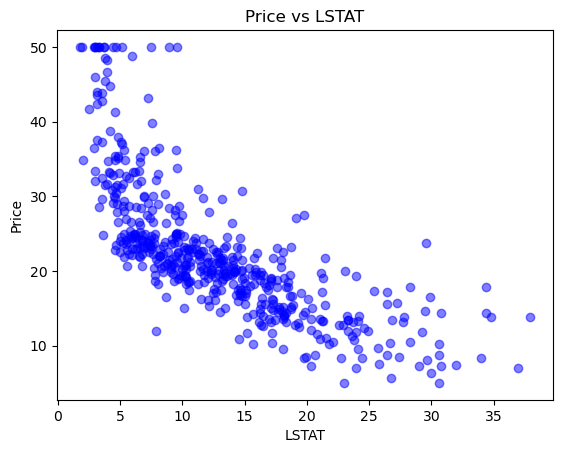

In [5]:
# Scatter plot for price vs LSTAT
plt.scatter(x, y, color='blue', alpha=0.5)
plt.title('Price vs LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('Price')
plt.show()

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(x.reshape(-1, 1))

In [7]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

In [8]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_hat_test = model.predict(X_test)

In [9]:
# Construct dataframe for predictions
predictions = pd.DataFrame({'y_test': y_test, 'y_hat_test': y_hat_test, 'resid': y_test - y_hat_test})

mse_test = np.mean(np.square(predictions['resid']))
rmse_test = np.sqrt(mse_test)
np.round(rmse_test,3)

5.248

### Estimating RMSE using cross validation

In [10]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

NMSE = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )

MSE_CV= np.mean(-NMSE)
RMSE_CV = np.sqrt(-NMSE).mean()
np.round(RMSE_CV,3)

5.276

## Using the my_polynomial_regression function

In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split




def my_polynomial_regression(poly_degree, X, y, test_size=0.2, rand_state=100):

    poly_features= PolynomialFeatures(degree=poly_degree)

    # transforms the existing features to higher degree features.
    X_poly = pd.DataFrame(poly_features.fit_transform(X.reshape(-1,1)))

    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=test_size, random_state=rand_state)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train, y_train)


    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train)

    # predicting on test data-set
    y_test_predicted = poly_model.predict(X_test)

   # evaluating the model on training dataset
    MSE_train = round(np.mean(np.square(y_train - y_train_predicted)),2)
    RMSE_train = round(np.sqrt(MSE_train),2)
    R2_train  = round(poly_model.score(X_train, y_train),3)


    # evaluating the model on test dataset
    MSE_test = round(np.mean(np.square(y_test - y_test_predicted)),2)
    RMSE_test = round(np.sqrt(MSE_test),2)
    R2_test  =  round(poly_model.score(X_test, y_test),3)



#     print("Traning model fit")
#     print("R2_train = {}".format(R2_train))

#     print("-------------------------------------------")
#     print("MSE_train = {}".format(MSE_train))
#     print("RMSE_train = {}".format(RMSE_train))

#     print("-------------------------------------------")
#     print("MSE_test = {}".format(MSE_test))
#     print("RMSE_test = {}".format(RMSE_test))

    return poly_degree, RMSE_train, RMSE_test

In [12]:
outputs= []
for i in range(1,11):
    outputs.append(my_polynomial_regression(poly_degree=i, X=x,y=y))

output = pd.DataFrame(outputs, columns=['Degree', 'RMSE_train', 'RMSE_test'])
output

,Degree,RMSE_train,RMSE_test
0,1,6.10,6.63
1,2,5.36,6.05
2,3,5.23,5.90
3,4,5.11,5.78
4,5,4.99,5.89
5,6,4.97,5.97
6,7,4.97,5.97
7,8,4.96,5.95
8,9,4.96,5.92
9,10,4.96,5.93


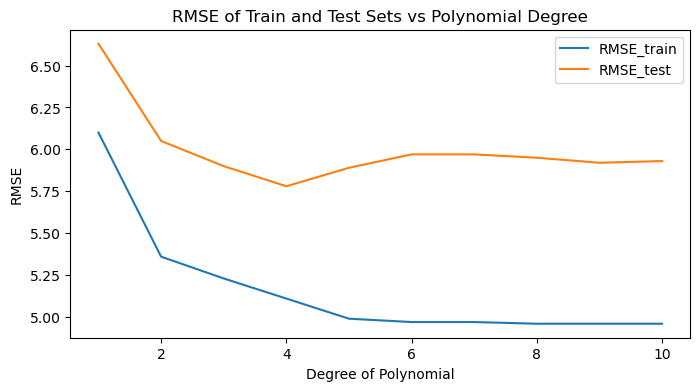

In [13]:
# Plotting RMSE_test and RMSE_train against Degree
plt.figure(figsize=(8, 4))
plt.plot(output['Degree'], output['RMSE_train'], label='RMSE_train')
plt.plot(output['Degree'], output['RMSE_test'], label='RMSE_test')
plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')
plt.title('RMSE of Train and Test Sets vs Polynomial Degree')
plt.legend()
plt.show()


The optimal polynomial degree based on the graph and the output is 4. This is because it minimizes the RMSE on the test data. 